##  Numerical exercises 9

### Introduction

In this exercise a Genetic Algorithm was applied to the Traveling Salesman Problem, which consist in findind the shortest route among a certain number of cities (coming back to starting city at the end). Two different situations were considered: at first 32 cities were randomly placed on a circumference of radius $r = 1$, then the same algorithm was applied to 32 cities randomly placed within a square of side $l = 2$.

### 9.1

On a basic level, the code consists in two classes:
- <font face="Courier">Chromosome</font></span>, which is basically a vector of 32 integers standing for the cities + methods to apply mutations or to evaluate the cost function associated to the route ($L^{(2)} = (\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2$ was used as cost function)
    
- <font face="Courier">Generation</font></span>, made up of a vector of Chromosomes + methos to modify or order them.

At each algorithm iteration:
1. the chromosomes in the current generation are ordered according to their $L_{(2)}$ length,
2. a selector method selects two chromosomes for crossover. This function is given a uniform double $r \in [0;1)$ and returns the index of the selected chromosome: the index is evaluated as $j=N\times int(r^p)$, where the exponent $p$ is read from the input file,
3. the crossover methos is called with 50% probability on the two selected chromosomes; the two last chromosomes (with the longest routes) are replaced by the new chromosomes obtained with crossover
4. the last two chromosomes may also have 4 different kinds of single-chromosome mutations, each with 10% probability:
    1. <font face="Courier">pair permutation(*int* i)</font></span> $\rightarrow$ swap a city with the following one
    2. <font face="Courier">shift(*int* quante_pos)</font></span> $\rightarrow$ shift all cities by a random number of positions
    3. <font face="Courier">permutation(*int* m)</font></span> $\rightarrow$ swap m cities with the remaining cities
    4. <font face="Courier">pair inversion(*int* i, *int* m)</font></span> $\rightarrow$ swap two cities random
    
These 4 steps are repeated a certain number of times (specified in the input file) to create a new generation.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

The following pictures report the final best path for 32 cities placed on a circumference and within a square.

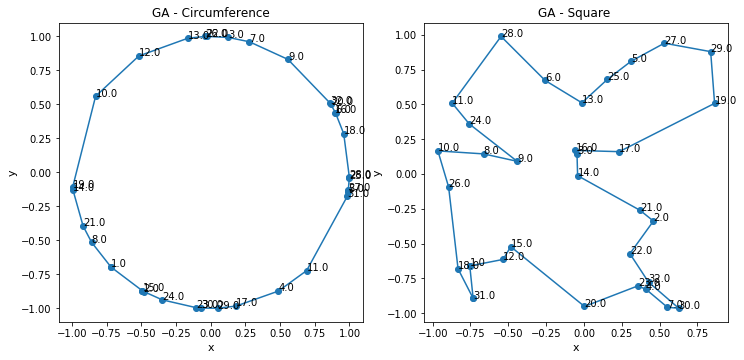

In [6]:
####Best path among 32 cities randomly placed on a circumference/within a square
M=32
x1 = np.loadtxt( './Outfiles/final_pos_circ.dat',max_rows=M , usecols=3)
y1 = np.loadtxt( './Outfiles/final_pos_circ.dat',max_rows=M , usecols=4 )
cities1 = np.loadtxt( './Outfiles/final_pos_circ.dat',max_rows=M , usecols=2)

x2 = np.loadtxt( 'Outfiles/final_pos_new4.dat',max_rows=M , usecols=3)
y2 = np.loadtxt( 'Outfiles/final_pos_new4.dat',max_rows=M , usecols=4 )
cities2 = np.loadtxt( 'Outfiles/final_pos_new4.dat',max_rows=M , usecols=2 )

plt.figure(figsize=(12,5.5))
plt.subplot(121)
plt.plot(x1, y1, '-o')
plt.plot([x1[31], x1[0]] , [y1[31], y1[0]] , "-o", color = "C0")
plt.xlabel("x", size=11)
plt.ylabel("y", size=11)
for i, txt in enumerate(cities1):
    plt.annotate(txt, (x1[i], y1[i]))
plt.title("GA - Circumference", size=12)

plt.subplot(122)
plt.plot(x2, y2, '-o')
plt.plot([x2[31], x2[0]] , [y2[31], y2[0]] , "-o", color = "C0")
plt.xlabel("x", size=11)
plt.ylabel("y", size=11)
plt.title("GA - Square ", size=12)
for i, txt in enumerate(cities2):
    plt.annotate(txt, (x2[i], y2[i]))

Each generation is composed of 500 chromosomes. The program was run a few times for both the circumference and the square to find the best parameters in the input file. The parameters giving the best result are listed below. 

**Circumference:**

Final route: $[ 1 \ \  8 \ \ 21 \ \ 14 \ \ 19 \ \ 10 \ \ 12 \ \ 13 \ \ 26 \ \ 22 \ \ 3 \ \ 7 \ \ 9 \ \ 32 \ \ 20 \ \ 16 \ \ 6 \ \ 18 \ \ 28 \ \ 25 \ \ 27 \ \ 5 \ \ 31 \ \ 11 \ \ 4 \ \ 17 \ \ 29 \ \ 30 \ \ 23 \ \ 24 \ \ 2 \ \ 15 ]$

Route length: 2.19855

Parameters: 
- *maxtimes* = 30 (the program will stop if cost function $L^{(2)}$ doesn't improve for *maxtimes* generations,
- *ngens* = 500 (maximum number of generations - the program actually stops at the 101st generation because of the above condition)
- *times_per_gen* = 300 (the 4 points above are repeated *times_per_gen* times to create each new generation)
- *sel_pow*= 1.5 (the exponent $p$ in the selector method)

**Square:**

Final route: $[ 1 \ \ 12 \ \ 15 \ \ 20 \ \ 23 \ \ 4 \ \ 7 \ \ 30 \ \ 32 \ \ 22 \ \ 2 \ \ 21 \ \ 14 \ \  3 \ \ 16 \ \ 17 \ \ 19 \ \ 29 \ \ 27 \ \ 5 \ \ 25 \ \ 13 \ \ 6 \ \ 28 \ \ 11 \ \ 24 \ \ 9 \ \ 8 \ \ 10 \ \ 26 \ \ 18 \ \ 31 ]
$

Route length: 3.64896

Parameters: 
- *maxtimes* = 30,
- *ngens* = 500 (the program actually stops at the 234th generation),
- *times_per_gen* = 300,
- *sel_pow*= 1.0 (the exponent $p$ in the selector method)

In the first case the input parameters do not seem to have a huge impact on the final result (the final path is always the same, while the number of generation before stopping may be different). On the other hand, in the second case the final path is influenced by the input parameters as well.

The following graphs report picturse of $L^{(2)}$ of the best path (left) and of $\langle L^{(2)} \rangle$ averaged on the best half of the population (right), as a function of the generations.

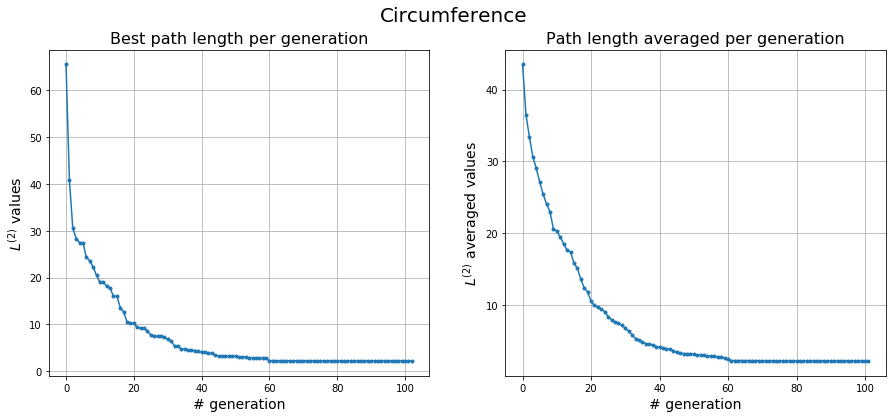

In [27]:
####Best path among 32 cities randomly placed on a circumference
l_ave = np.loadtxt( './Outfiles/l2_values_circ.dat')
l_best = np.loadtxt( './Outfiles/l2_first_circ.dat')
x_a = np.arange(len(l_ave))
x_b = np.arange(len(l_best))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
plt.suptitle("Circumference", size=20)
ax1.plot(x_b,l_best, '-o', markersize=3)
ax1.set_xlabel("# generation", size=14)
ax1.set_ylabel("$L^{(2)}$ values", size=14)
ax1.set_title("Best path length per generation", size=16)
ax1.grid(True)

ax2.plot(x_a,l_ave, '-o', markersize=3)
ax2.set_xlabel("# generation", size=14)
ax2.set_ylabel("$ L^{(2)} $ averaged values", size=14)
ax2.set_title("Path length averaged per generation", size=16)
ax2.grid(True)

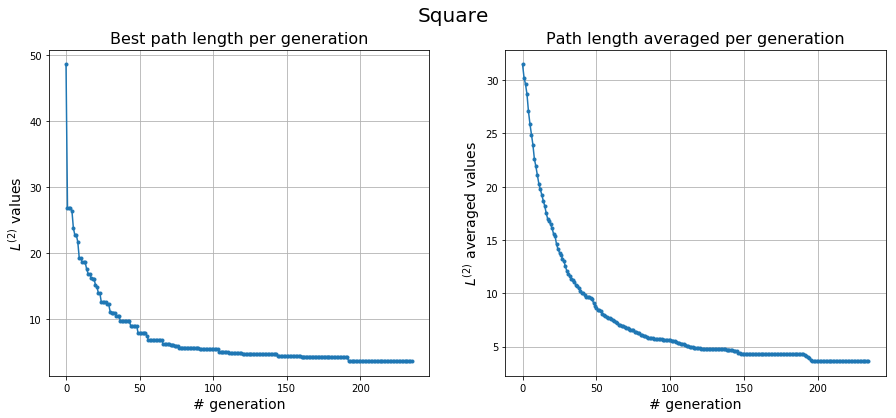

In [28]:
####Best path among 32 cities randomly placed within a square (l=2)
l_ave = np.loadtxt( './Outfiles/l2_values_new4.dat')
l_best = np.loadtxt( './Outfiles/l2_first_new4.dat' )
x_a = np.arange(len(l_ave))
x_b = np.arange(len(l_best))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
plt.suptitle("Square", size=20)
ax1.plot(x_b,l_best, '-o', markersize=3)
ax1.set_xlabel("# generation", size=14)
ax1.set_ylabel("$L^{(2)}$ values", size=14)
ax1.set_title("Best path length per generation", size=16)
ax1.grid(True)

ax2.plot(x_a,l_ave, '-o', markersize=3)
ax2.set_xlabel("# generation", size=14)
ax2.set_ylabel("$ L^{(2)} $ averaged values", size=14)
ax2.set_title("Path length averaged per generation", size=16)
ax2.grid(True)